In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [22]:
csv_file_path = r'C:\Users\Administrator\Downloads\mail_data.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
###Drop Nan Values
df=df.dropna()

In [24]:
## Get the Independent Features

X=df["Message"]

In [25]:
## Get the Dependent features
y=df['Category']

In [26]:
X.shape

(5572,)

In [27]:
y.shape

(5572,)

In [28]:

messages=X.copy()

In [29]:
df['Message'][1]

'Ok lar... Joking wif u oni...'

In [30]:
df.reset_index(inplace=True)

In [31]:
import nltk
import re
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Dataset Preprocessing

In [33]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', df['Category'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
max_words = 10000
max_length = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['Message'])
train_sequences = tokenizer.texts_to_sequences(train_data['Message'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = tokenizer.texts_to_sequences(test_data['Message'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

train_labels = train_data['Category'].values
test_labels = test_data['Category'].values


In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_length),
    tf.keras.layers.LSTM(256, return_sequences=True),  # Add return_sequences=True for stacked LSTM
    tf.keras.layers.Dropout(0.5),  # Dropout layer
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),  # Dropout layer
    tf.keras.layers.Dense(200, activation='softmax'),
    tf.keras.layers.Dense(100, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_14 (LSTM)              (None, 100, 256)          328704    
                                                                 
 dropout_10 (Dropout)        (None, 100, 256)          0         
                                                                 
 lstm_15 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               25800     
                                                                 
 dense_18 (Dense)            (None, 100)              

In [60]:
num_epochs = 15
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


Epoch 1/15
140/140 [==============================] - 90s 574ms/step - loss: 0.6465 - accuracy: 0.8236 - val_loss: 0.5976 - val_accuracy: 0.8664
Epoch 2/15
140/140 [==============================] - 86s 614ms/step - loss: 0.5608 - accuracy: 0.8658 - val_loss: 0.5267 - val_accuracy: 0.8664
Epoch 3/15
140/140 [==============================] - 65s 463ms/step - loss: 0.5011 - accuracy: 0.8658 - val_loss: 0.4771 - val_accuracy: 0.8664
Epoch 4/15
140/140 [==============================] - 65s 461ms/step - loss: 0.4597 - accuracy: 0.8658 - val_loss: 0.4433 - val_accuracy: 0.8664
Epoch 5/15
140/140 [==============================] - 65s 466ms/step - loss: 0.4323 - accuracy: 0.8658 - val_loss: 0.4215 - val_accuracy: 0.8664
Epoch 6/15
140/140 [==============================] - 65s 467ms/step - loss: 0.4154 - accuracy: 0.8658 - val_loss: 0.4088 - val_accuracy: 0.8664
Epoch 7/15
140/140 [==============================] - 64s 454ms/step - loss: 0.4056 - accuracy: 0.8658 - val_loss: 0.4015 - val_ac

In [61]:
loss, accuracy = model.evaluate(test_padded, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


35/35 [==============================] - 4s 121ms/step - loss: 0.3933 - accuracy: 0.8664
Test Loss: 0.3932623863220215
Test Accuracy: 0.8663676977157593


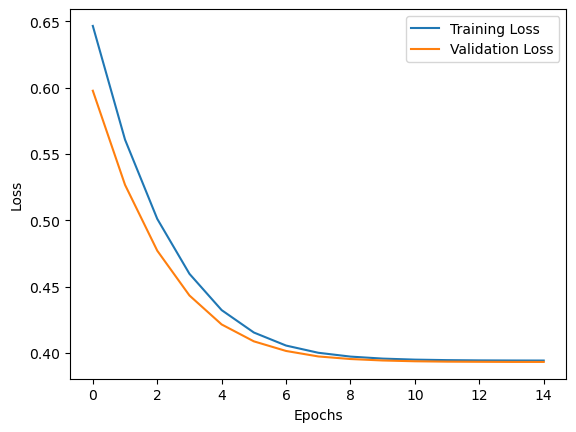

In [62]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


35/35 [==============================] - 4s 119ms/step


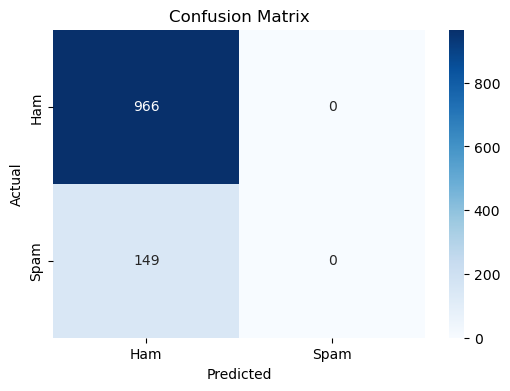

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels on test data
test_predictions = model.predict(test_padded)
test_predictions = np.round(test_predictions).flatten()

# Create confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Ham', 'Spam']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
